In [1]:
#Carregando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
#Importando dados
dataset = pd.read_csv("household_power_consumption.txt",delimiter=";")

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Verficando algumas informações dos dados
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
dataset.shape

(2075259, 9)

In [5]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [6]:
s = dataset.select_dtypes(include='object').columns

In [7]:
dataset_1 = dataset.iloc[:,2:9].dropna()

In [8]:
dataset_2 = dataset_1.iloc[:,0:7].astype("float")

In [9]:
dataset_2.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [10]:
dataset_2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


(array([1.986801e+06, 5.332000e+03, 4.308000e+03, 5.834000e+03,
        4.469700e+04, 1.365000e+03, 2.950000e+02, 1.370000e+02,
        4.690000e+02, 4.200000e+01]),
 array([ 0. ,  8.8, 17.6, 26.4, 35.2, 44. , 52.8, 61.6, 70.4, 79.2, 88. ]),
 <a list of 10 Patch objects>)

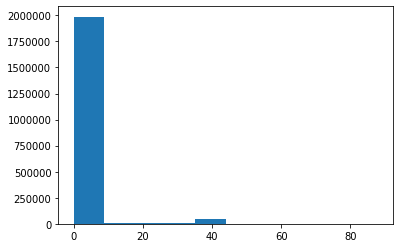

In [11]:
plt.hist(dataset_2["Sub_metering_1"], label = "density")

In [12]:
np.max(dataset_2["Sub_metering_1"])

88.0

In [13]:
dataset_2[dataset_2["Sub_metering_1"] > 60]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
12731,5.524,0.142,236.08,23.4,76.0,0.0,0.0
12732,5.646,0.144,235.83,23.8,75.0,0.0,0.0
12733,5.674,0.146,236.36,24.0,75.0,0.0,0.0
12734,5.694,0.150,237.46,24.0,76.0,0.0,0.0
12735,5.708,0.150,237.76,24.0,77.0,0.0,0.0
...,...,...,...,...,...,...,...
2043556,6.626,0.146,237.24,27.8,81.0,0.0,1.0
2043557,5.954,0.158,237.58,25.4,72.0,0.0,1.0
2043559,6.598,0.152,236.70,27.8,80.0,0.0,1.0
2043560,6.576,0.146,236.65,27.8,79.0,0.0,0.0


In [14]:
#Coletando apenas os valores do dataset
dataset_3 = dataset_2.values
dataset_3

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [15]:
#Coleta uma amostra de 2%
amostra_1, amostra_2 = train_test_split(dataset_3, train_size = .02)

In [16]:
amostra_1.shape

(40985, 7)

In [17]:
amostra_2.shape

(2008295, 7)

(array([26429.,   129.,   115.,   608.,   155., 10602.,  2514.,    50.,
           64.,   319.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

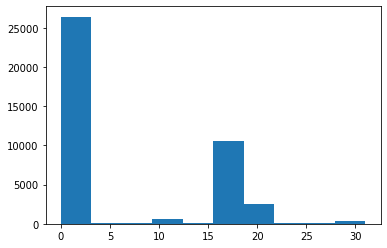

In [18]:
#Conhecendo as distribuição de cada variável da amostragem
plt.hist(amostra_1[:,6], label = "density")

In [19]:
#Aplicação de dimensionalidade (PCA)
pca = PCA(n_components = 2).fit_transform(amostra_1)

In [20]:
pca

array([[-6.18574078,  1.28841486],
       [-5.80263739,  0.57339757],
       [ 9.37309172, -5.1092669 ],
       ...,
       [14.97423511,  3.01563565],
       [10.66419695, -5.0439479 ],
       [-5.38502856,  0.86032002]])

### Utilizando primeiro algoritmo para definição de cluster = DBSCAN

In [21]:
dbscan_1 = DBSCAN()
dbscan_1.fit(amostra_1.data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [22]:
dbscan_1.labels_

array([ 0,  1,  2, ..., -1,  8,  1], dtype=int64)

In [23]:
df = pd.DataFrame(dbscan_1.labels_)
df[0].value_counts()

 0      11610
-1       6821
 1       5896
 4       4038
 5       2601
        ...  
 44         4
 138        4
 152        4
 97         4
 121        3
Name: 0, Length: 154, dtype: int64

### Não consegui definir grupos de cluster com esse algoritmo

######################################################################

### Utilizando segundo algoritmo para definição de cluster = KMEANS
### Agora definindo um range de cluster para se trabalhar


In [24]:
#Realizando o treinamento de um range de valores para realizar a curva de Elbow
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca)
    Sum_of_squared_distances.append(km.inertia_)

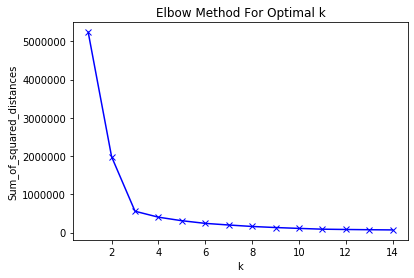

In [25]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

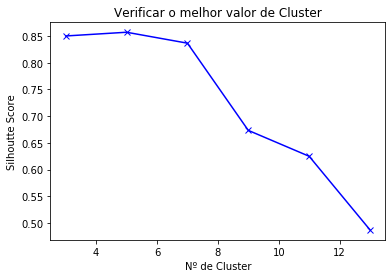

In [57]:
#Testando valores de cluster 3,5,7,9,11,13
i = range(3,15,2)
k = []
n = []
for i in i:
    modelo = KMeans(n_clusters=i)
    modelo = modelo.fit(pca)
    
    labels = modelo.labels_
    k.append(silhouette_score(pca,labels,metric= "euclidean"))
    n.append(i)
    
plt.plot(n,k, 'bx-')
plt.xlabel('Nº de Cluster')
plt.ylabel('Silhoutte Score')
plt.title('Verificar o melhor valor de Cluster')
plt.show()

    

### Escolhido 5 clusters devido ao silhouette_score ter sido o maior

In [43]:
#Definindo o modelo com 5 Clusters
modelo_5 = KMeans(n_clusters=5)
modelo_5 = modelo_5.fit(pca)

In [40]:
#Realizando o cluster MAP
names = dataset_2.columns

In [41]:
names

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [42]:
clustermap = pd.DataFrame(data = amostra_1, columns=names)

In [44]:
clustermap["Cluster"] = modelo_5.labels_

In [45]:
clustermap.groupby('Cluster')['Global_active_power'].mean()

Cluster
0    0.525015
1    1.795545
2    3.309196
3    3.613714
4    4.604897
Name: Global_active_power, dtype: float64